In [24]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import harmonypy
import palantir
# Plotting imports
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import random
random.seed(101)


In [20]:
%matplotlib inline

In [26]:
week6_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week6")
week6_ad.var_names_make_unique()

week7_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week7")
week7_ad.var_names_make_unique()

week8_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week8")
week8_ad.var_names_make_unique()

week15_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week15")
week15_ad.var_names_make_unique()

week16_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week16")
week16_ad.var_names_make_unique()

week12_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week12/Male_Week_12_gene_matrix/")
week12_ad.var_names_make_unique()


In [27]:
all_data = week6_ad.concatenate(week7_ad, week8_ad, index_unique=None)

https://anndata.readthedocs.io/en/latest/generated/anndata.concat.html#anndata.concat


/home/NETID/bhansen3/anaconda3/envs/sc-testis/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/NETID/bhansen3/anaconda3/envs/sc-testis/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/NETID/bhansen3/anaconda3/envs/sc-testis/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [16]:
ob_list = (week6_ad,week7_ad)

In [17]:
scp.pl.violin(ob_list, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

AttributeError: 'tuple' object has no attribute '_sanitize'

In [14]:
week6_ad.var['mt'] = week6_ad.var_names.str.startswith('MT-')
week7_ad.var['mt'] = week7_ad.var_names.str.startswith('MT-')
week8_ad.var['mt'] = week8_ad.var_names.str.startswith('MT-')
week12_ad.var['mt'] = week12_ad.var_names.str.startswith('MT-')
week15_ad.var['mt'] = week15_ad.var_names.str.startswith('MT-')
week16_ad.var['mt'] = week16_ad.var_names.str.startswith('MT-')


In [15]:
scp.pp.calculate_qc_metrics(week6_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
scp.pp.calculate_qc_metrics(week7_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
scp.pp.calculate_qc_metrics(week8_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
scp.pp.calculate_qc_metrics(week12_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
scp.pp.calculate_qc_metrics(week15_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
scp.pp.calculate_qc_metrics(week16_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)

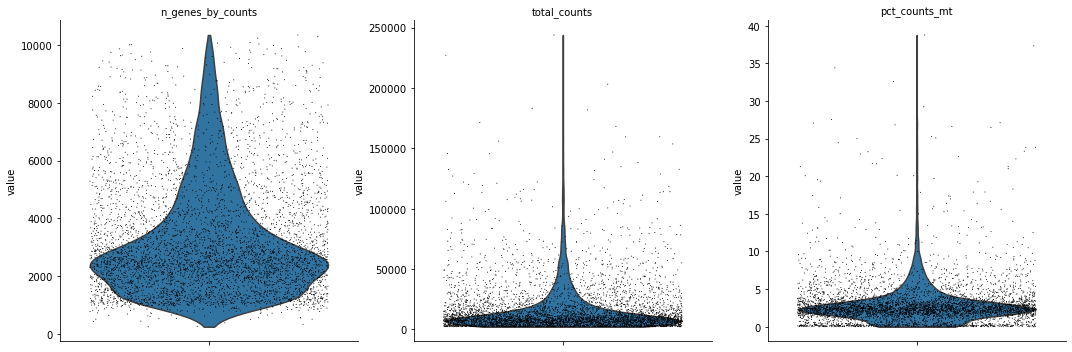

In [8]:
scp.pl.violin(week7_ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
             

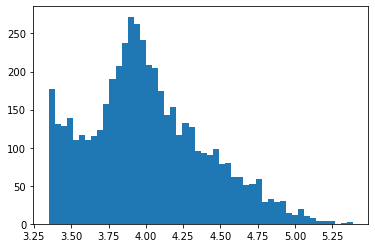

In [12]:
plt.hist(np.log10(week7_ad.obs['total_counts']), 50);